Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
eda = pd.read_csv('D:\cap\capstone2\data\interim\eda.csv', low_memory=False)

In [4]:
eda.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_GYRO,INSTR_HELI,INSTR_IAIR,INSTR_IHEL,INSTR_PLFT,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20001208X0880311,20001208X08803,20001208X088031,20001208X0880312,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,20001208X0880311,20001208X08803,20001208X088031,20001208X0880313,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,20001208X0880311,20001208X08803,20001208X088031,20001208X0880314,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,C,ACC,USA,N,N,DAYL,F

In [5]:
eda['crew_age'].fillna(0, inplace=True)
eda['crew_age'] = eda['crew_age'].astype(int)

In [6]:
#drop pilot duplicate to analyze pilot data
pilot = eda.drop_duplicates(subset=['pilot_key'])
pilot.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_GYRO,INSTR_HELI,INSTR_IAIR,INSTR_IHEL,INSTR_PLFT,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,9/14/1997 0:00:00,91,N,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,20080109X0003611,20080109X00036,20080109X000361,20080109X0003611,1/1/2008 0:00:00,91,N,PILOT,54,F,CL3,VALID,9/1/2006 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,40,Wind,40,Crosswind,99,Not specified,F,ACC,USA,N,N,DAYL,NONE,VMC,NONE,PERS,Landing,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,42.0,42.0,0.0,0.0,2.0,4.0,16.0,870.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,16.0,260.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,16.0,870.0,1000.0,0.0,0.0,0.0,0.0,0.0,85.0,85.0
7,7,20080116X0006311,20080116X00063,NaN,20080116X0006311,1/5/2008 0:00:00,NaN,NaN,PILOT,50,M,CL1,VALID,8/7/2007 0:00:00,1,Aircraft,3,Aircraft structures,52,Doors,30,Cargo/baggage doors,13,Incorrect service/maintenance,C,ACC,USA,N,N,DAYL,FATL,VMC,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,3.0,74.0,179.0,0.0,9437.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,1108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,2328.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0
12,12,20080117X0006711,20080117X00067,NaN,20080117X0006711,1/14/2008 0:00:00,NaN,NaN,PILOT,38,M,CL1,VALID,1/1/2008 0:00:00,2,Personnel issues,2,Psychological,20,Perception/orientation/illusio,25,Spatial disorientation,44,Pilot,C,ACC,USA,N,N,NDRK,FATL,VMC,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1

count    14032.000000
mean        53.135832
std         15.767688
min          0.000000
25%         43.000000
50%         55.000000
75%         65.000000
max        100.000000
Name: crew_age, dtype: float64

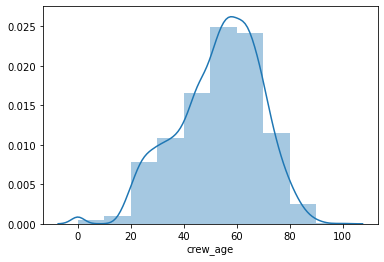

In [7]:
sns.distplot(pilot['crew_age'], bins=10)
pilot['crew_age'].describe()

In [8]:
pilot0 = pilot[pilot['crew_age'] == 0]
pilot0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 64 to 47389
Columns: 146 entries, Unnamed: 0 to SIMU-TOTL
dtypes: float64(111), int32(1), int64(6), object(28)
memory usage: 85.8+ KB


There are 75 pilots with no age information. Age will be derived from experiece level by total flight time as compared to other pilots in the dataset.

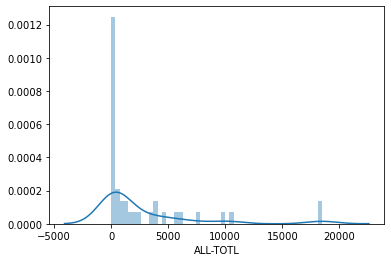

In [9]:
sns.distplot(pilot0['ALL-TOTL'], bins=50)

A number of pilot with no age information are also missing total-time information and therefore their age will not be derived by algorithim. These pilots will be assigned the median age for the dataset.

In [10]:
# fill in pilot age with average pilot age based on total flight hours

#define pilot experience categories in bin of 250 hours
pilot0_max_hour = pilot0['ALL-TOTL'].max()
age_med_by_time = {} #holds median age for each time bracket
for hour_bin in range(1, int(pilot0_max_hour), 250):
    time_range = (hour_bin, hour_bin + 250)
    pop_age = eda[(eda['ALL-TOTL'] >= int(hour_bin)) & (eda['ALL-TOTL'] < (int(hour_bin) + 250))]
    age_med_by_time[time_range] = int(pop_age['crew_age'].median())
    
totl_idx = pilot0.columns.get_loc('ALL-TOTL')
age_idx = pilot0.columns.get_loc('crew_age')

for i in range(0, len(pilot0.index)):
    for key in age_med_by_time:
        if (pilot0.iloc[i,totl_idx] >= key[0]) & (pilot0.iloc[i,totl_idx] < key[1]):
            pilot0.iloc[i,age_idx] = age_med_by_time[key]
            

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
#aged_pilots contains pilots with derived ages based on experience
aged_pilots = pilot0[pilot0['crew_age'] != 0]
aged_pilots.reset_index(inplace=True)
print(aged_pilots.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 147 entries, index to SIMU-TOTL
dtypes: float64(111), int32(1), int64(7), object(28)
memory usage: 43.6+ KB
None


In [12]:
zero_count = eda[eda['crew_age'] == 0].count()
zero_count

Unnamed: 0    3593
pilot_key      205
ev_id         3593
ac_key         415
find_key      3593
              ... 
SIMU-L24H      100
SIMU-L30D      100
SIMU-L90D      100
SIMU-PIC       100
SIMU-TOTL      100
Length: 146, dtype: int64

In [13]:
#backfill ages to eda df.
for i in range (0, len(aged_pilots.index)):
    for r in range (0, len(eda.index)):
        if aged_pilots.iloc[i,2] == eda.iloc[r,1]:
            eda.iloc[r,9] = aged_pilots.iloc[i,10]

In [14]:
eda['crew_age'].describe()

count    47643.000000
mean        49.544592
std         20.308484
min          0.000000
25%         39.000000
50%         54.000000
75%         64.000000
max        100.000000
Name: crew_age, dtype: float64

In [15]:
zero_count = eda[eda['crew_age'] == 0].count()
zero_count

Unnamed: 0    3495
pilot_key      107
ev_id         3495
ac_key         342
find_key      3495
              ... 
SIMU-L24H        2
SIMU-L30D        2
SIMU-L90D        2
SIMU-PIC         2
SIMU-TOTL        2
Length: 146, dtype: int64

In [16]:
#mean age of pilot in overall dataset
age_avg_df = eda[eda['crew_age']!=0]
avg_age = int(age_avg_df['crew_age'].mean())
print(avg_age)

53


In [17]:
#backfill remaining 0 ages with df average.
for i in range (0, len(eda.index)):
    if eda.iloc[i,9] == 0:
        eda.iloc[i,9] = int(avg_age)

In [18]:
# eda table is now adjusted with derived ages
eda['crew_age'].describe()

count    47643.000000
mean        53.432571
std         14.768896
min         14.000000
25%         44.000000
50%         54.000000
75%         64.000000
max        100.000000
Name: crew_age, dtype: float64